<a href="https://colab.research.google.com/github/ArumPark1231/hello-world/blob/master/IMDB_%EC%98%81%ED%99%94_%EB%A6%AC%EB%B7%B0_%ED%8A%9C%ED%86%A0%EB%A6%AC%EC%96%BC_Pandas%EB%A1%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%88%EB%9F%AC%EC%98%A4%EA%B8%B0_%EC%BA%90%EA%B8%80_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D(%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5)_colab_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas로 데이터 불러오기

### Bag of Words Meets Bags of Popcorn

*  [tutorial](https://www.kaggle.com/c/word2vec-nlp-tutorial)

#### [자연 언어 처리 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%9E%90%EC%97%B0_%EC%96%B8%EC%96%B4_%EC%B2%98%EB%A6%AC)

자연 언어 처리(自然言語處理) 또는 자연어 처리(自然語處理)는 인간이 발화하는 언어 현상을 기계적으로 분석해서 컴퓨터가 이해할 수 있는 형태로 만드는 자연 언어 이해 혹은 그러한 형태를 다시 인간이 이해할 수 있는 언어로 표현하는 제반 기술을 의미한다. (출처 : 위키피디아)

##### 자연어처리(NLP)와 관련 된 캐글 경진대회

[Sentiment Analysis on Movie Reviews | Kaggle](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews)  
[Toxic Comment Classification Challenge | Kaggle](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge)  
[Spooky Author Identification | Kaggle](https://www.kaggle.com/c/spooky-author-identification)  


### 튜토리얼 개요  

#### 파트1

* 초보자를 대상으로 기본 자연어 처리를 다룬다.

#### 파트2, 3

* Word2Vec을 사용하여 모델을 학습시키는 방법과 감정분석에 단어 벡터를 사용하는 방법을 본다.  

* 파트3는 레시피를 제공하지 않고 Word2Vec을 사용하는 몇 가지 방법을 실험해 본다.

* 파트3에서는 K-means 알고리즘을 사용해 군집화를 해본다.

* 긍정과 부정 리뷰가 섞여 있는 100,000만 개의 IMDB 감정분석 데이터 세트를 통해 목표를 달성해 본다.

#### 평가 - ROC 커브(Receiver-Operating Characteristic curve)

* TRP(True Positive Rate)와 FPR(False Positive Rate)을 각각 x, y 축으로 놓은 그래프
* 민감도 TPR
    * 1인 케이스에 대해 1로 예측한 비율
    * 암 환자를 진찰해서 암이라고 진단함
* 특이도 FPR

    * 0인 케이스에 대해 1로 잘못 예측한 비율
    * 암 환자가 아닌데 암이라고 진단함
* X, Y가 둘 다 [0, 1] 범위이고 (0, 0)에서 (1, 1)을 잇는 곡선이다.

* ROC 커브의 및 면적이 1에 가까울 수록(왼쪽 꼭짓점에 다가갈수록) 좋은 성능

* 참고 :

[New Sight :: Roc curve, AUR(AUCOC), 민감도, 특이도](https://newsight.tistory.com/53)  
[ROC의 AUC 구하기 :: 진화하자 - 어디에도 소속되지 않기](https://adnoctum.tistory.com/121)  
[Receiver operating characteristic - Wikipedia](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)  

#### Use Google's Word2Vec for movie reviews 

*  자연어 텍스트를 분석해서 특정단어를 얼마나 사용했는지, 얼마나 자주 사용했는지, 어떤 종류의 텍스트인지 분류하거나 긍정인지 부정인지에 대한 감정분석, 그리고 어떤 내용인지 요약하는 정보를 얻을 수 있다.  

*  감정분석은 머신러닝(기계학습)에서 어려운 주제로 풍자, 모호한 말, 반어법, 언어유희로 표현을 하는데 이는 사람과 컴퓨터에게 모두 오해의 소지가 있다. 여기에서는 Word2Vec을 통한 감정분석을 해보는 튜토리얼을 해본다.  

*  Google의 Word2Vec은 단어의 의미와 관계를 이해하는 데 도움  

*  상당수의 NLP기능은 nltk모듈에 구현되어 있는데 이 모듈은 코퍼스, 함수와 알고리즘으로 구성되어 있다.  

*  단어 임베딩 모형 테스트 : [Korean Word2Vec](http://word2vec.kr/search/)  


#### BOW(bag of words)

*  가장 간단하지만, 효과적이라 널리 쓰이는 방법  
*  장, 문단, 문장, 서식과 같은 입력 텍스트의 구조를 제외하고 각 단어가 이 말뭉치에 얼마나 많이 나타나는지만 헤아린다.  
*  구조와 상관없이 단어의 출현횟수만 세기 때문에 텍스트를 담는 가방(bag)으로 생각할 수 있다.  
*  BOW는 단어의 순서가 완전히 무시 된다는 단점이 있다. 예를 들어 의미가 완전히 반대인 두 문장이 있다고 하다.  

    *  it's bad, not good at all.
    *  it's good, not bad at all.
*  위 두 문장은 의미가 전혀 반대지만 완전히 동일하게 반환된다.  
*  이를 보완하기 위해 n-gram을 사용하는 데 BOW는 하나의 토큰을 사용하지만, n-gram은 n개의 토큰을 사용할 수 있도록 한다.  

*  [Bag-of-words model - Wikipedia](https://en.wikipedia.org/wiki/Bag-of-words_model)

### 파트 1

NLP는?  
NLP(자연어처리)는 텍스트 문제에 접근하기 위한 기술 집합이다.  
이 튜토리얼에서는 IMDB 영화 리뷰를 로딩하고 정제하고 간단한 BOW(Bag of Words) 모델을 적용하여 리뷰가 추천인지 아닌지에 대한 정확도를 예측한다.  

#### 시작하기 전에

이 튜토리얼은 파이썬으로 되어 있으며, NLP에 익숙하다면 파트2 로 건너뛰어도 된다.  

In [0]:
from google.colab import drive #colab에서 주피터 노트북을 import해 왔을 때 kaggle API와 충돌하는 문제가 있어 이를 해결해보려고 함
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
#!pip install kaggle
import kaggle

In [0]:
import pandas as pd
#!kaggle competitions download -c word2vec-nlp-tutorial

401 - Unauthorized


In [0]:
#!unzip labeledTrainData.tsv.zip

In [0]:
#!unzip testData.tsv.zip # 드디어 colab과 kaggle 잘 연결해서 데이터 다운로드 후 압축풀기까지 성공함
#두 번째 시도에서는 랩탑에 저장돼있던 파일을 colab에 직접 업로드해주었음

In [0]:
"""
header = 0 은 파일의 첫 번째 줄에 열 이름이 있음을 나타내며
delimiter = \t 는 필드가 탭으로 구분되는 것을 의미한다.
quoting = 3은 큰따옴표를 무시하도록 한다.
"""
# QUOTE_MINIMAL (0), QUOTE_ALL (1), 
# QUOTE_NONNUMERIC (2) or QUOTE_NONE (3).

# 레이블인 sentiment가 있는 학습 데이터
train = pd.read_csv('/content/labeledTrainData.tsv', 
                    header=0, delimiter='\t', quoting=3)
# 레이블이 없는 테스트 데이터
test = pd.read_csv('/content/testData.tsv', 
                   header=0, delimiter='\t', quoting=3)
train.shape

(13150, 3)

In [0]:
train.head(3)
#train.tail(3)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."


In [0]:
test.shape

(12884, 2)

In [0]:
test.head()
#test.tail()

,id,review
0,"""12311_10""","""Naturally in a film who's main themes are of ..."
1,"""8348_2""","""This movie is a disaster within a disaster fi..."
2,"""5828_4""","""All in all, this is a movie for kids. We saw ..."
3,"""7186_2""","""Afraid of the Dark left me with the impressio..."
4,"""12128_7""","""A very accurate depiction of small time mob l..."


In [0]:
train.columns.values

array(['id', 'sentiment', 'review'], dtype=object)

In [0]:
# 레이블인 'sentiment'가 없다. 이 데이터를 기계학습을 통해 예측한다.
test.columns.values

array(['id', 'review'], dtype=object)

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13150 entries, 0 to 13149
Data columns (total 3 columns):
id           13150 non-null object
sentiment    13150 non-null int64
review       13150 non-null object
dtypes: int64(1), object(2)
memory usage: 308.3+ KB


In [0]:
train.describe()

,sentiment
count,13150.000000
mean,0.503346
std,0.500008
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [0]:
train['sentiment'].value_counts()

1    6619
0    6531
Name: sentiment, dtype: int64

In [0]:
# html 태그가 섞여 있기 때문에 이를 정제해줄 필요가 있음
train['review'][0][:700]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik'

### NLP 텍스트 데이터 전처리

### 데이터 정제 Data Cleaning and Text Preprocessing

기계가 텍스트를 이해할 수 있도록 텍스트를 정제해 준다.

1. BeautifulSoup(뷰티풀숩)을 통해 HTML 태그를 제거  
2. 정규표현식으로 알파벳 이외의 문자를 공백으로 치환  
3. NLTK 데이터를 사용해 불용어(Stopword)를 제거  
4. 어간추출(스테밍 Stemming)과 음소표기법(Lemmatizing)의 개념을 이해하고 SnowballStemmer를 통해 어간을 추출  

### 텍스트 데이터 전처리 이해하기#

(출처 : [트위터 한국어 형태소 분석기](https://github.com/twitter/twitter-korean-text))

#### 정규화 normalization (입니닼ㅋㅋ -> 입니다 ㅋㅋ, 샤릉해 -> 사랑해)

* 한국어를 처리하는 예시입니닼ㅋㅋㅋㅋㅋ -> 한국어를 처리하는 예시입니다 ㅋㅋ

#### 토큰화 tokenization

* 한국어를 처리하는 예시입니다 ㅋㅋ -> 한국어Noun, 를Josa, 처리Noun, 하는Verb, 예시Noun, 입Adjective, 니다Eomi ㅋㅋKoreanParticle  

#### 어근화 stemming (입니다 -> 이다)

* 한국어를 처리하는 예시입니다 ㅋㅋ -> 한국어Noun, 를Josa, 처리Noun, 하다Verb, 예시Noun, 이다Adjective, ㅋㅋKoreanParticle  

#### 어구 추출 phrase extraction  

* 한국어를 처리하는 예시입니다 ㅋㅋ -> 한국어, 처리, 예시, 처리하는 예시  

Introductory Presentation: [Google Slides](https://docs.google.com/presentation/d/10CZj8ry03oCk_Jqw879HFELzOLjJZ0EOi4KJbtRSIeU/edit#slide=id.g71b871db5_0_0)  

*  뷰티풀숩이 설치되지 않았다면 우선 설치해 준다. !pip install BeautifulSoup4

In [0]:
# 설치 및 버전확인
#!pip3 install BeautifulSoup4
!pip show BeautifulSoup4

Name: beautifulsoup4
Version: 4.6.3
Summary: Screen-scraping library
Home-page: http://www.crummy.com/software/BeautifulSoup/bs4/
Author: Leonard Richardson
Author-email: leonardr@segfault.org
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: 
Required-by: google, fastai, bs4


In [0]:
from bs4 import BeautifulSoup

example1 = BeautifulSoup(train['review'][0], "html.parser") #여기 문제 있던 부분인데, replacing "html5lib" for "html.parser"으로 해결
print(train['review'][0][:700])
example1.get_text()[:700]

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik


'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyw'

In [0]:
# 정규표현식을 사용해서 특수문자를 제거
import re
# 소문자와 대문자가 아닌 것은 공백으로 대체한다.
letters_only = re.sub('[^a-zA-Z]', ' ', example1.get_text())
letters_only[:700]

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyw'

In [0]:
# 모두 소문자로 변환한다.
lower_case = letters_only.lower()
# 문자를 나눈다. => 토큰화
words = lower_case.split()
print(len(words))
words[:10]

437


['with',
 'all',
 'this',
 'stuff',
 'going',
 'down',
 'at',
 'the',
 'moment',
 'with']

### 불용어 제거(Stopword Removal)

일반적으로 코퍼스에서 자주 나타나는 단어는 학습 모델로서 학습이나 예측 프로세스에 실제로 기여하지 않아 다른 텍스트와 구별하지 못한다. 예를 들어 조사, 접미사, i, me, my, it, this, that, is, are 등과 같은 단어는 빈번하게 등장하지만, 실제 의미를 찾는데 크게 기여하지 않는다. Stopwords는 to또는 the와 같은 용어를 포함하므로 사전 처리 단계에서 제거하는 것이 좋다. NLTK에는 153개의 영어 불용어가 미리 정의되어 있다. 17개의 언어에 대해 정의되어 있으며 한국어는 없다.  

#### NLTK data 설치

*  [http://corazzon.github.io/nltk_data_install](http://corazzon.github.io/nltk_data_install)

In [0]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')[:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [0]:
# stopwords 를 제거한 토큰들
words = [w for w in words if not w in stopwords.words('english')]
print(len(words))
words[:10]

219


['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary']

### 스테밍(어간추출, 형태소 분석)
출처 : [어간 추출 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%96%B4%EA%B0%84_%EC%B6%94%EC%B6%9C)  

*  어간 추출(語幹 抽出, 영어: stemming)은 어형이 변형된 단어로부터 접사 등을 제거하고 그 단어의 어간을 분리해 내는 것  
*  message, messages, messaging과 같이 복수형, 진행형 등의 문자를 같은 의미의 단어로 다룰 수 있도록 도와준다.  
*  stemming(형태소 분석): 여기에서는 NLTK에서 제공하는 형태소 분석기를 사용한다. 포터 형태소 분석기는 보수적이고 랭커스터 형태소 분석기는 좀 더 적극적이다. 형태소 분석 규칙의 적극성 때문에 랭커스터 형태소 분석기는 더 많은 동음이의어 형태소를 생산한다. 

In [0]:
# 포터 스태머의 사용 예
stemmer = nltk.stem.PorterStemmer()
print(stemmer.stem('maximum'))
print("The stemmed form of running is: {}".format(stemmer.stem("running")))
print("The stemmed form of runs is: {}".format(stemmer.stem("runs")))
print("The stemmed form of run is: {}".format(stemmer.stem("run")))

maximum
The stemmed form of running is: run
The stemmed form of runs is: run
The stemmed form of run is: run


In [0]:
# 랭커스터 스태머의 사용 예
from nltk.stem.lancaster import LancasterStemmer
lancaster_stemmer = LancasterStemmer()
print(lancaster_stemmer.stem('maximum'))
print("The stemmed form of running is: {}".format(lancaster_stemmer.stem("running")))
print("The stemmed form of runs is: {}".format(lancaster_stemmer.stem("runs")))
print("The stemmed form of run is: {}".format(lancaster_stemmer.stem("run")))

maxim
The stemmed form of running is: run
The stemmed form of runs is: run
The stemmed form of run is: run


In [0]:
# 처리 전 단어
words[:10]

['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary']

In [0]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')
words = [stemmer.stem(w) for w in words]
# 처리 후 단어
words[:10]

['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

### Lemmatization 음소표기법  

언어학에서 음소 표기법 (또는 lemmatization)은 단어의 보조 정리 또는 사전 형식에 의해 식별되는 단일 항목으로 분석될 수 있도록 굴절된 형태의 단어를 그룹화하는 과정이다.  

예를 들어 동음이의어가 문맥에 따라 다른 의미가 있는데  

    1) 배가 맛있다.
    2) 배를 타는 것이 재미있다.
    3) 평소보다 두 배로 많이 먹어서 배가 아프다.  

위에 있는 3개의 문장에 있는 배는 모두 다른 의미가 있다.  

레마타이제이션은 이때 앞뒤 문맥을 보고 단어의 의미를 식별하는 것이다.  
영어에서 meet는 meeting으로 쓰였을 때 회의를 뜻하지만, meet일 때는 만나다는 뜻을 갖는데 그 단어가 명사로 쓰였는지 동사로 쓰였는지에 따라 적합한 의미가 있도록 추출하는 것이다.  

*  참고 :
    *  [Stemming and lemmatization](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)  
    *  [Lemmatisation - Wikipedia](https://en.wikipedia.org/wiki/Lemmatisation)  

In [0]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

print(wordnet_lemmatizer.lemmatize('fly'))
print(wordnet_lemmatizer.lemmatize('flies'))

words = [wordnet_lemmatizer.lemmatize(w) for w in words]
# 처리 후 단어
words[:10]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
fly
fly


['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

*  하지만 이 튜토리얼에서는 Stemming과 Lemmatizing을 소개만 해서 stemming 코드를 별도로 추가하였다.

### 문자열 처리

*  위에서 간략하게 살펴본 내용을 바탕으로 문자열을 처리해 본다.

In [0]:
def review_to_words( raw_review ):
    # 1. HTML 제거
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. 영문자가 아닌 문자는 공백으로 변환
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. 소문자 변환
    words = letters_only.lower().split()
    # 4. 파이썬에서는 리스트보다 세트로 찾는 게 훨씬 빠르다.
    # stopwords 를 세트로 변환한다.
    stops = set(stopwords.words('english'))
    # 5. Stopwords 불용어 제거
    meaningful_words = [w for w in words if not w in stops]
    # 6. 어간추출
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. 공백으로 구분된 문자열로 결합하여 결과를 반환
    return( ' '.join(stemming_words) )

In [0]:
clean_review = review_to_words(train['review'][0])
clean_review

'stuff go moment mj start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obvious messag drug bad kay visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene bottom line movi peopl like mj one level anoth think peopl stay

In [0]:
# 첫 번째 리뷰를 대상으로 전처리해줬던 내용을 전체 텍스트 데이터를 대상으로 처리한다.
# 전체 리뷰 데이터 수 가져오기
num_reviews = train['review'].size
num_reviews

13150

In [0]:
"""
clean_train_reviews = []
캐글 튜토리얼에는 range가 xrange로 되어있지만 
여기에서는 python3를 사용하기 때문에 range를 사용했다.
"""
# for i in range(0, num_reviews):
#     clean_train_reviews.append( review_to_words(train['review'][i]))
"""
하지만 위 코드는 어느 정도 실행이 되고 있는지 알 수가 없어서
5000개 단위로 상태를 찍도록 개선했다.
"""
# clean_train_reviews = []
# for i in range(0, num_reviews):
    # if (i + 1)%5000 == 0:
        # print('Review {} of {} '.format(i+1, num_reviews))
    # clean_train_reviews.append(review_to_words(train['review'][i]))

"""
그리고 코드를 좀 더 간결하게 하려고 for loop를 사용하는
대신 apply를 사용하도록 개선
"""
# %time train['review_clean'] = train['review'].apply(review_to_words)
"""
코드는 한 줄로 간결해졌지만 여전히 오래 걸림
"""
# CPU times: user 1min 15s, sys: 2.3 s, total: 1min 18s
# Wall time: 1min 20s

'\n코드는 한 줄로 간결해졌지만 여전히 오래 걸림\n'

In [0]:
# 참고 : https://gist.github.com/yong27/7869662
# http://www.racketracer.com/2016/07/06/pandas-in-parallel/
from multiprocessing import Pool
import numpy as np

def _apply_df(args):
    df, func, kwargs = args
    return df.apply(func, **kwargs)

def apply_by_multiprocessing(df, func, **kwargs):
    # 키워드 항목 중 workers 파라메터를 꺼냄
    workers = kwargs.pop('workers')
    # 위에서 가져온 workers 수로 프로세스 풀을 정의
    pool = Pool(processes=workers)
    # 실행할 함수와 데이터프레임을 워커의 수 만큼 나눠 작업
    result = pool.map(_apply_df, [(d, func, kwargs)
            for d in np.array_split(df, workers)])
    pool.close()
    # 작업 결과를 합쳐서 반환
    return pd.concat(list(result))

In [0]:
%time clean_train_reviews = apply_by_multiprocessing(\
    train['review'], review_to_words, workers=4)  

CPU times: user 83.8 ms, sys: 110 ms, total: 194 ms
Wall time: 25.5 s


In [0]:
%time clean_test_reviews = apply_by_multiprocessing(\
    test['review'], review_to_words, workers=4)    

CPU times: user 81.2 ms, sys: 118 ms, total: 200 ms
Wall time: 23.7 s


### CountVectorizer로 텍스트 데이터 벡터화  

### 워드 클라우드

*  단어의 빈도수 데이터를 가지고 있을 때 이용할 수 있는 시각화 방법  
*  단순히 빈도수를 표현하기보다는 상관관계나 유사도 등으로 배치하는 게 더 의미 있기 때문에 큰 정보를 얻기는 어렵다.  

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# %matplotlib inline 설정을 해주어야지만 노트북 안에 그래프가 디스플레이 된다.
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(stopwords = STOPWORDS, 
                          background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

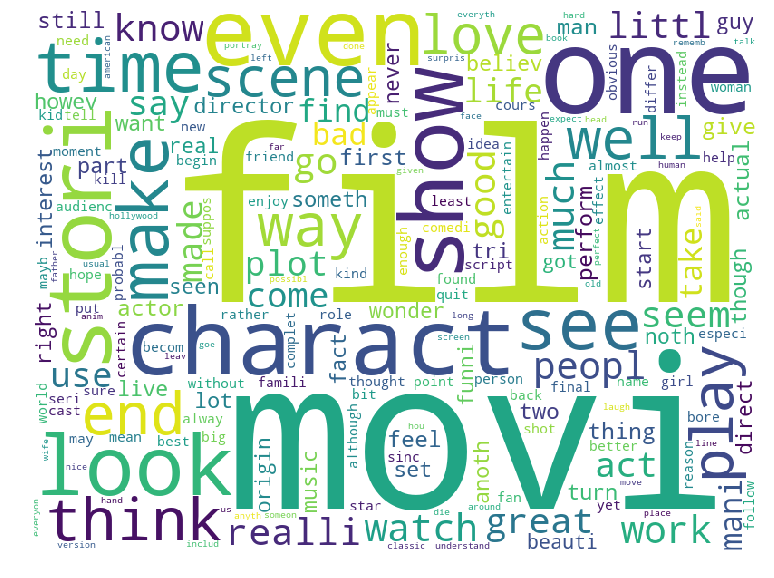

CPU times: user 11.4 s, sys: 805 ms, total: 12.2 s
Wall time: 12.2 s


In [0]:
# 학습 데이터의 모든 단어에 대한 워드 클라우드를 그려본다.
%time displayWordCloud(' '.join(clean_train_reviews))

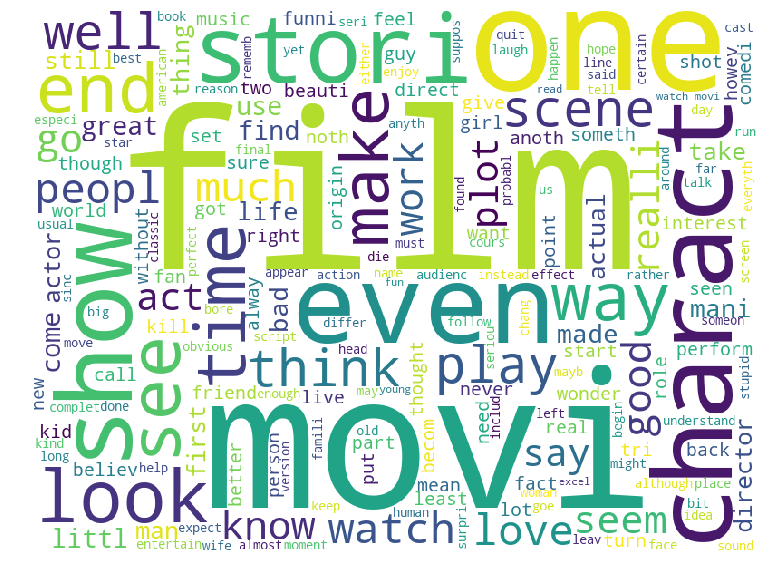

CPU times: user 10.9 s, sys: 661 ms, total: 11.6 s
Wall time: 11.6 s


In [0]:
# 테스트 데이터의 모든 단어에 대한 워드 클라우드를 그려본다.
%time displayWordCloud(' '.join(clean_test_reviews))

In [0]:
# 단어 수
train['num_words'] = clean_train_reviews.apply(lambda x: len(str(x).split()))
# 중복을 제거한 단어 수
train['num_uniq_words'] = clean_train_reviews.apply(lambda x: len(set(str(x).split())))

In [0]:
# 첫 번째 리뷰에 
x = clean_train_reviews[0]
x = str(x).split()
print(len(x))
x[:10]

219


['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

In [0]:
import seaborn as sns

import matplotlib # 그래프에서 한글이 깨져서 이를 해결하려고 넣은 새로운 코드

# 그래프에서 한글표현을 위해 폰트를 설치합니다.
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum > /dev/null
    
matplotlib.rcParams['axes.unicode_minus'] = False   

In [0]:
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=2)

In [0]:
# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

리뷰 별 단어 평균값 : 120.70281368821293
리뷰 별 단어 중간값 89.0
리뷰 별 고유 단어 평균값 : 94.91262357414449
리뷰 별 고유 단어 중간값 75.0


Text(0.5, 1.0, '리뷰 별 고유한 단어 수 분포')

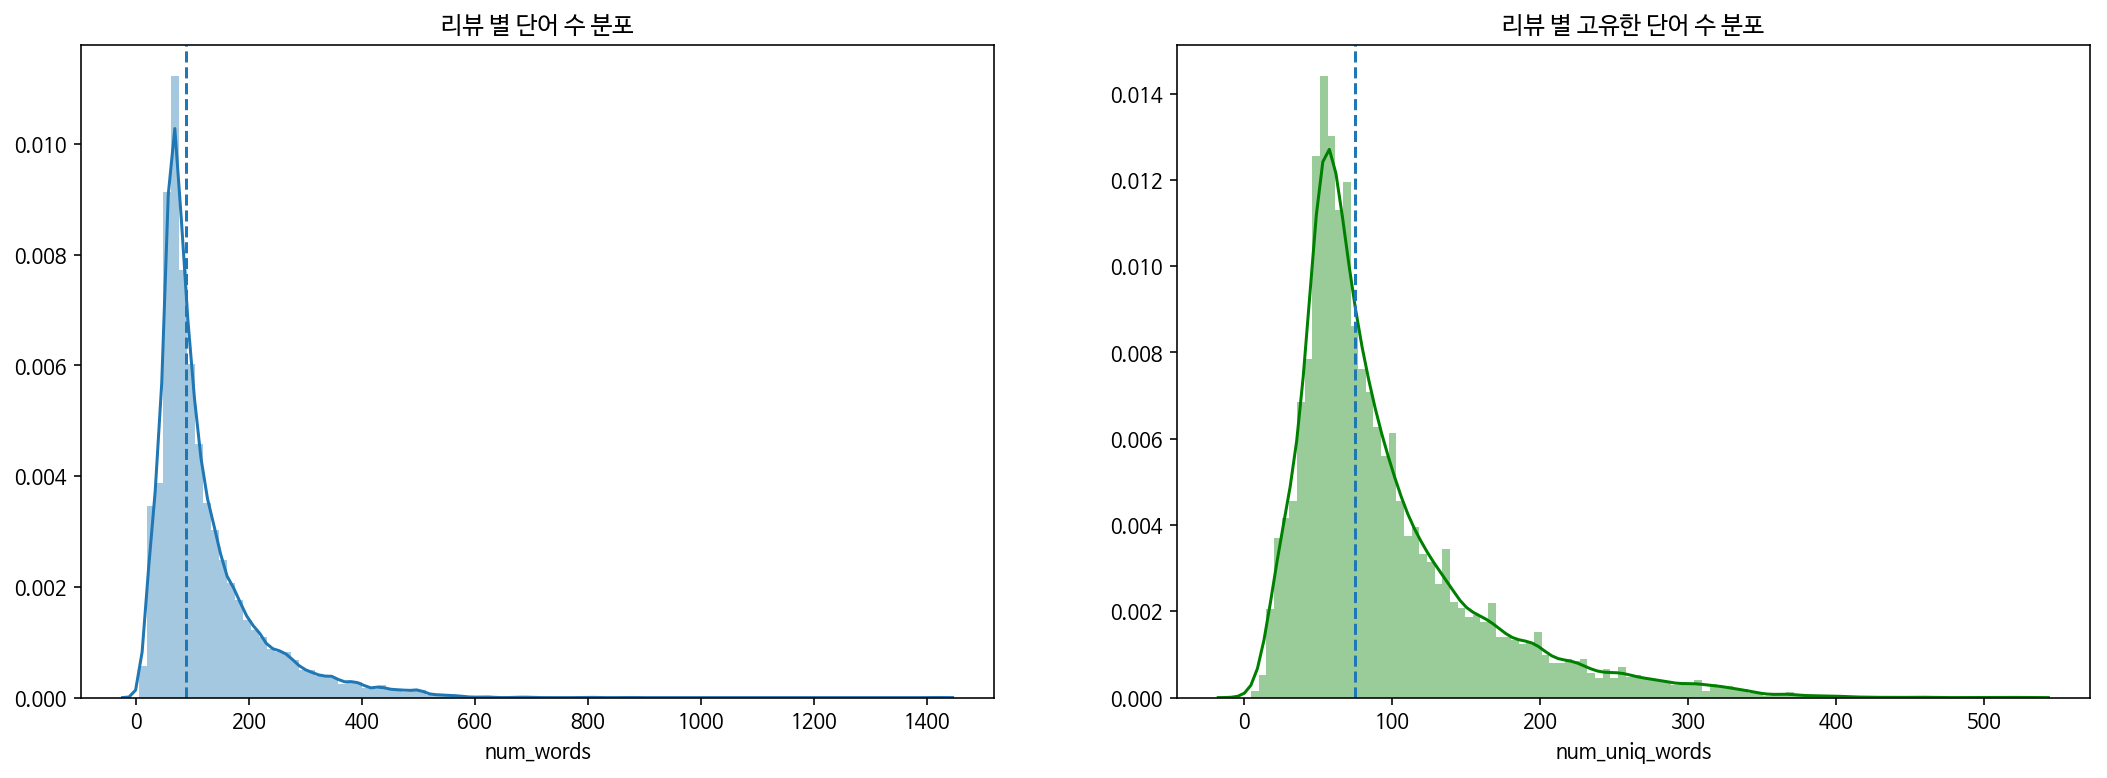

In [0]:
fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(18, 6)
print('리뷰 별 단어 평균값 :', train['num_words'].mean())
print('리뷰 별 단어 중간값', train['num_words'].median())
sns.distplot(train['num_words'], bins=100, ax=axes[0])
axes[0].axvline(train['num_words'].median(), linestyle='dashed')
axes[0].set_title('리뷰 별 단어 수 분포')

print('리뷰 별 고유 단어 평균값 :', train['num_uniq_words'].mean())
print('리뷰 별 고유 단어 중간값', train['num_uniq_words'].median())
sns.distplot(train['num_uniq_words'], bins=100, color='g', ax=axes[1])
axes[1].axvline(train['num_uniq_words'].median(), linestyle='dashed')
axes[1].set_title('리뷰 별 고유한 단어 수 분포')

### [Bag-of-words model - Wikipedia](https://en.wikipedia.org/wiki/Bag-of-words_model)

다음의 두 문장이 있다고 하자,

(1) John likes to watch movies. Mary likes movies too.  
(2) John also likes to watch football games.  

위 두 문장을 토큰화 하여 가방에 담아주면 다음과 같다.

[
    "John",
    "likes",
    "to",
    "watch",
    "movies",
    "Mary",
    "too",
    "also",
    "football",
    "games"
]  

그리고 배열의 순서대로 가방에서 각 토큰이 몇 번 등장하는지 횟수를 세어준다.

(1) [1, 2, 1, 1, 2, 1, 1, 0, 0, 0]  
(2) [1, 1, 1, 1, 0, 0, 0, 1, 1, 1]  
=> 머신러닝 알고리즘이 이해할 수 있는 형태로 바꿔주는 작업이다.

단어 가방을 n-gram을 사용해 bigram 으로 담아주면 다음과 같다.  

[
    "John likes",
    "likes to",
    "to watch",
    "watch movies",
    "Mary likes",
    "likes movies",
    "movies too",
]  
=> 여기에서는 CountVectorizer를 통해 위 작업을 한다.  

### 사이킷런의 CountVectorizer를 통해 피처 생성  

*  정규표현식을 사용해 토큰을 추출한다.  
*  모두 소문자로 변환시키기 때문에 good, Good, gOod이 모두 같은 특성이 된다.  
*  의미없는 특성을 많이 생성하기 때문에 적어도 두 개의 문서에 나타난 토큰만을 사용한다.  
*  min_df로 토큰이 나타날 최소 문서 개수를 지정할 수 있다.  

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

# 튜토리얼과 다르게 파라메터 값을 수정
# 파라메터 값만 수정해도 캐글 스코어 차이가 많이 남
vectorizer = CountVectorizer(analyzer = 'word', 
                             tokenizer = None,
                             preprocessor = None, 
                             stop_words = None, 
                             min_df = 2, # 토큰이 나타날 최소 문서 개수
                             ngram_range=(1, 3),
                             max_features = 20000
                            )
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=20000, min_df=2,
                ngram_range=(1, 3), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
# 여기에서는 하나의 과정만 묶어주어 pipeline이 불필요 할 수도 있습니다.
# pipeline은 feature engineering의 여러 과정을 묶어 줄 때 사용합니다.
pipeline = Pipeline([
    ('vect', vectorizer),
])

In [0]:
%time train_data_features = pipeline.fit_transform(clean_train_reviews)
train_data_features

CPU times: user 18.9 s, sys: 545 ms, total: 19.4 s
Wall time: 19.4 s


<13150x20000 sparse matrix of type '<class 'numpy.int64'>'
	with 1468199 stored elements in Compressed Sparse Row format>

*  보통 fit을 학습하는데 사용하는데 여기에서는 벡터화 할 때도 fit을 사용했습니다. 사이킷런에 구현된 벡터화 알고리즘이 fit을 사용해서 벡터화 하도록 되어 있습니다. 따라서 RF에서의 fit과 벡터화에 사용되는 fit은 다른 성격입니다.  

### pipeline
  
*  제 유튜브 영상에 성능을 위해 pipeline을 사용했다는 말이 있는데 이 부분을 정정합니다.
*  아래의 공식 문서를 보면 pipeline 에서 메모리의 캐시를 사용할 수 있다는 문구도 있습니다. 하지만 성능상의 이슈라기보다는 cross-validation 과 GridSearch 과정을 하나로 만들어 주는게 pipeline의 가장 큰 장점이라고 합니다.  

*  제 코드에는 cross-validation 과 GridSearch 과정이 없는데 해당 과정은 모델의 성능(정확도)를 측정해 보는 과정이고, GridSearch는 최적의 하이퍼파라메터를 찾는 과정입니다.  
*  Sequentially apply a list of transforms and a final estimator. Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods. The final estimator only needs to implement fit. The transformers in the pipeline can be cached using memory argument.  

*  더 읽어보기 : [https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)  

In [0]:
train_data_features.shape

(13150, 20000)

In [0]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

20000


['aag',
 'aaron',
 'abandon',
 'abbi',
 'abbot',
 'abc',
 'abduct',
 'abhay',
 'abid',
 'abigail']

In [0]:
# 벡터화 된 피처를 확인해 봄
import numpy as np
dist = np.sum(train_data_features, axis=0)
    
for tag, count in zip(vocab, dist):
    print(count, tag)
    
pd.DataFrame(dist, columns=vocab)

[[ 19  31 160 ...  34  36  21]] aag


,aag,aaron,abandon,abbi,abbot,abc,abduct,abhay,abid,abigail,abil,abl,abl captur,abl enjoy,abl get,abl make,abl see,abl watch,abli,aboard,abomin,aborigin,abort,abound,abraham,abraham lincoln,abroad,abrupt,absenc,absent,absolut,absolut amaz,absolut aw,absolut beauti,absolut brilliant,absolut fantast,absolut hate,absolut hilari,absolut horribl,absolut love,...,yuen,yugoslavia,yukon,yummi,yup,yuppi,yuzna,yvonn,zabriski,zabriski point,zadora,zane,zani,zap,zatoichi,zealand,zelah,zelah clark,zelda,zenia,zentropa,zero,zero day,zero star,zeta,zeta jone,zhang,zizek,zodiac,zodiac killer,zoe,zombi,zombi film,zombi flick,zombi movi,zone,zoo,zoom,zorro,zu
0,19,31,160,15,14,86,24,14,12,22,299,712,12,12,27,17,30,21,13,24,43,44,47,35,52,19,17,67,57,43,979,12,19,13,19,11,12,25,14,52,...,16,20,15,12,12,20,13,18,29,26,13,31,22,13,27,21,21,18,12,14,16,208,23,12,18,17,22,42,31,16,19,706,24,22,42,99,15,34,36,21


In [0]:
pd.DataFrame(train_data_features[:10].toarray(), columns=vocab).head()

,aag,aaron,abandon,abbi,abbot,abc,abduct,abhay,abid,abigail,abil,abl,abl captur,abl enjoy,abl get,abl make,abl see,abl watch,abli,aboard,abomin,aborigin,abort,abound,abraham,abraham lincoln,abroad,abrupt,absenc,absent,absolut,absolut amaz,absolut aw,absolut beauti,absolut brilliant,absolut fantast,absolut hate,absolut hilari,absolut horribl,absolut love,...,yuen,yugoslavia,yukon,yummi,yup,yuppi,yuzna,yvonn,zabriski,zabriski point,zadora,zane,zani,zap,zatoichi,zealand,zelah,zelah clark,zelda,zenia,zentropa,zero,zero day,zero star,zeta,zeta jone,zhang,zizek,zodiac,zodiac killer,zoe,zombi,zombi film,zombi flick,zombi movi,zone,zoo,zoom,zorro,zu
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## [랜덤 포레스트 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/랜덤_포레스트)    
랜덤 포레스트의 가장 핵심적인 특징은 임의성(randomness)에 의해 서로 조금씩 다른 특성을 갖는 트리들로 구성된다는 점이다. 이 특징은 각 트리들의 예측(prediction)들이 비상관화(decorrelation) 되게하며, 결과적으로 일반화(generalization) 성능을 향상시킨다. 또한, 임의화(randomization)는 포레스트가 노이즈가 포함된 데이터에 대해서도 강하게 만들어 준다.


In [0]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤포레스트 분류기를 사용
forest = RandomForestClassifier(
    n_estimators = 100, n_jobs = -1, random_state=2018)
forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2018, verbose=0,
                       warm_start=False)

In [0]:
%time forest = forest.fit(train_data_features, train['sentiment'])

CPU times: user 31.7 s, sys: 60 ms, total: 31.7 s
Wall time: 16.2 s


In [0]:
from sklearn.model_selection import cross_val_score
%time score = np.mean(cross_val_score(\
    forest, train_data_features, \
    train['sentiment'], cv=10, scoring='roc_auc'))
score

CPU times: user 6.25 s, sys: 650 ms, total: 6.9 s
Wall time: 2min 24s


0.9228734445224076

### 캐글 스코어와 CV 결과가 다른 이유

*  cross validation은 train 데이터로 점수를 낸것이고, 캐글은 test 데이터로 점수를 구한거라 결과가 다릅니다.  

시험공부에 비유해 보면,  
    1) 기출문제를 모은다 (feature engineering)  
    2) 공부한다 (model.fit)  
    3) 시험본다 (predict)    
    
* 여기에서 2번 단계를 하는 여러 전략이 있을텐데요, 기출문제를 모두 외워버리면 과연 내가 실제 시험을 잘 치룰 수 있을지 아니면 공부를 더 해야할지 판단하기가 애매합니다.  
*  괜찮은 전략 중 하나는 기출문제 중 일부를 임의로 뽑아내서 공부하고(training set을 이용한 학습),  
*  나머지 기출문제를 풀어보며 내가 얼마나 잘 푸는지 평가를 해보는겁니다(validation set을 통해 학습의 성과를 검증).  
*  잘 된다 싶으면 시험을 볼 준비가 된 것입니다(실전 투입).  
*  기출문제를 몽땅 외우면 기출문제 내에서는 100점을 받겠지만(overfitting), 실전에서도 그러한 성적을 가두리라 기대하기 어렵습니다.


### 예측


In [0]:
# 위에서 정제해준 리뷰의 첫 번째 데이터를 확인
clean_test_reviews[0]

'natur film main theme mortal nostalgia loss innoc perhap surpris rate high older viewer younger one howev craftsmanship complet film anyon enjoy pace steadi constant charact full engag relationship interact natur show need flood tear show emot scream show fear shout show disput violenc show anger natur joyc short stori lend film readi made structur perfect polish diamond small chang huston make inclus poem fit neat truli masterpiec tact subtleti overwhelm beauti'

In [0]:
# 테스트 데이터를 벡터화 함
%time test_data_features = pipeline.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()

CPU times: user 3.54 s, sys: 24.9 ms, total: 3.56 s
Wall time: 3.58 s


In [0]:
test_data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [0]:
# 벡터화 된 단어로 숫자가 문서에서 등장하는 횟수를 나타낸다
test_data_features[5][:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
# 벡터화 하며 만든 사전에서 해당 단어가 무엇인지 찾아볼 수 있다.
# vocab = vectorizer.get_feature_names()
vocab[8], vocab[2558], vocab[2559], vocab[2560]

('abid', 'charact start', 'charact still', 'charact stori')

In [0]:
# 테스트 데이터를 넣고 예측한다.
result = forest.predict(test_data_features)
result[:10]

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0])

### 캐글 제출을 위해 예측결과 저장

In [0]:
# 예측 결과를 저장하기 위해 데이터프레임에 담아 준다.
output = pd.DataFrame(data={'id':test['id'], 'sentiment':result})
output.head()

,id,sentiment
0,"""12311_10""",1
1,"""8348_2""",0
2,"""5828_4""",0
3,"""7186_2""",1
4,"""12128_7""",1


In [0]:
output.to_csv('data/tutorial_1_BOW_{0:.5f}.csv'.format(score), index=False, quoting=3)

FileNotFoundError: ignored

In [0]:
output_sentiment = output['sentiment'].value_counts()
print(np.abs(output_sentiment[0] - output_sentiment[1]))
output_sentiment

### Train, Test의 감정분류 결과 값 비교

In [0]:
fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.countplot(train['sentiment'], ax=axes[0])
sns.countplot(output['sentiment'], ax=axes[1])

첫 번째 제출을 할 준비가 되었다. 리뷰를 다르게 정리하거나 'Bag of Words' 표현을 위해 다른 수의 어휘 단어를 선택하거나 포터 스테밍 등을 시도해 볼 수 있다. 다른 데이터세트로 NLP를 시도해 보려면 로튼 토마토(Rotten Tomatoes)를 해보는 것도 좋다.  

*  로튼 토마토 데이터 셋을 사용하는 경진대회 : [Sentiment Analysis on Movie Reviews | Kaggle](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews)  

### 캐글 제출 결과

In [0]:
# 파라메터를 조정해 가며 점수를 조금씩 올려본다.

# uni-gram 사용 시 캐글 점수 0.84476
print(436/578)
# tri-gram 사용 시 캐글 점수 0.84608
print(388/578)
# 어간추출 후 캐글 점수 0.84780
print(339/578)
# 랜덤포레스트의 max_depth = 5 로 지정하고
# CountVectorizer의 tokenizer=nltk.word_tokenize 를 지정 후 캐글 점수 0.81460
print(546/578)
# 랜덤포레스트의 max_depth = 5 는 다시 None으로 변경
# CountVectorizer max_features = 10000개로 변경 후 캐글 점수 0.85272
print(321/578)
# CountVectorizer의 tokenizer=nltk.word_tokenize 를 지정 후 캐글 점수 0.85044
print(326/578)
# CountVectorizer max_features = 10000개로 변경 후 캐글 점수 0.85612
print(305/578)
# 0.85884
print(296/578)

print(310/578)

0.754325259515571
0.671280276816609
0.5865051903114187
0.9446366782006921
0.5553633217993079
0.5640138408304498
0.527681660899654
0.5121107266435986
0.5363321799307958
